In [70]:
import functions

In [71]:
import datetime

In [72]:
import nltk
import string

In [73]:
import re

In [74]:
import pickle

In [75]:
import pandas as pd
import numpy as np

In [76]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [77]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [78]:
from collections import Counter

In [79]:
from imblearn.under_sampling import RandomUnderSampler

In [80]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# NLP Pipeline 

![](images/pipeline-walkthrough1.png)

Below is a to do list when converting text into vector form: 

**Clean text and Create a Bag of Words (BoW)**
>1. Lowercase the text
2. Tokenize 
3. Strip out punctuation or undesirable text
4. Remove Stopwords 
5. Stemming or Lemmatizing
6. Compute N-Grams
7. Use this to create BoW

**Vectorize BoW**
>8. Term Frequencies
9. Document Frequencies
10. TF-IDF
11. Normalize vectors

Let's go through both what each of these steps are and how to do them in python with the following corpus of comments about data science...
 

In [81]:
# function to vectorize the type_of_material series into a y target vector.
def vectorize_y_ser(ser):
    y = ser.copy()
    y.replace({'Op-Ed': 1,'News': 0}, inplace=True)
    return y

In [82]:
#rate of correct predictions out of total predictions
def metrics_(tn, fp, fn, tp):
    accuracy = (tp + tn) / (tn + fn + tp + fp)
    print(f'Accuracy: {round(accuracy, 2)}')
    recall = (tp) / (tp + fn)
    print(f'Recall: {round(recall, 2)}')
    precision = (tp) / (tp + fp)
    print(f'Precision: {round(precision, 2)}')
    print(f'TN:{tn} FP:{fp} FN:{fn} TP:{tp}')
    return (accuracy, recall, precision)

In [83]:
#prints number of features, stop words and parameters for vectorizer
def vectorizer_parameters(vectorizer):
    #features
    feat_names = vectorizer.get_feature_names()
    num_feat = len(feat_names)
    
    #stop words
    stop_words = vectorizer.stop_words_
    num_stop = len(stop_words)

    params = vectorizer.get_params()
    
    print(f'Number of features: {num_feat}, Numbers of stop words: {num_stop}')
      
    for key, val in params.items():
        print(f'{key}: {val}')

In [84]:
#function that removes string.punctuation w/out the '?'
def punc_strip(document):
    for char in document:
        if char in '!"#$%&\'()*+—,-./:;<=>?@[\\]^_`{|}~”’“':
            document = document.replace(char, " ") 
    return document

In [85]:
#combine print, type, text columns in the list
def printed_file(file):
    print_cols = ['_id','print_page','pub_date','keywords','type_of_material','lead_paragraph','text']    
    df = pd.read_csv(file, usecols=print_cols, index_col='_id', low_memory=False)
    df = df[df.print_page.isna() == False]
    df = df[~df.text.isna() == True]
    return df

In [86]:
#combine print, type, text columns in the list
def printed_df(df):
    print_cols = ['print_page','pub_date','keywords','type_of_material','lead_paragraph','text']    
    df = df[print_cols]
    df = df[df.print_page.isna() == False]
    df = df[~df.text.isna() == True]
    return df

In [87]:
#returns articles w/ 'United States Politics and Government' as a keyword
def return_pol_gov(row):
    list_dict = eval(row.keywords)
    for (dic) in (list_dict):
        if dic.get('value') == 'United States Politics and Government':
            return True

In [88]:
def filter_keyword(df, keyword='United States Politics and Government'):
    df[keyword] = df.apply(return_pol_gov, axis=1)
    df = df[df[keyword] == True]
    return df

In [89]:
#returns shape of news and oped
def oped_v_news(df):
    df.type_of_material.hist()
    news = sum(df.type_of_material == "News")
    oped = sum(df.type_of_material == "Op-Ed")
    print(f'News: {news} Oped: {oped}, Total: {oped+news}, Op-Ed {round(oped/(oped+news), 2)} of total')
    #plt.savefig('img/oped_news_hist.png')

In [90]:
#split article and return quote
def return_quote(document):
    article = []
    quote_list = []
    
    open_quote = "“"
    close_quote = "”"
    
    close_split = document.split(close_quote)
    
    for string in close_split:

        quote = string.split(open_quote)
        article.append(quote.pop(0))
        quote_list += quote
    
    article = " ".join(article)
    quotation = " ".join(quote_list)
        
    return(quotation)

In [91]:
#split article and return quote
def return_article(document):
    article = []
    quote_list = []
    
    open_quote = "“"
    close_quote = "”"
    
    close_split = document.split(close_quote)
    
    for string in close_split:

        quote = string.split(open_quote)
        article.append(quote.pop(0))
        quote_list += quote
    
    article = " ".join(article)
    quotation = " ".join(quote_list)
    
    return(article)

In [96]:
df_list_auto = []
for num in range(2010,2021):
    df_list_auto.append(f'/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_{num}.csv')

In [97]:
df_list_auto

['/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2010.csv',
 '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2011.csv',
 '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2012.csv',
 '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2013.csv',
 '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2014.csv',
 '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2015.csv',
 '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2016.csv',
 '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2017.csv',
 '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2018.csv',
 '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2019.csv',
 '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2020.csv']

In [98]:
files = []
for file in df_list_auto:
    df = printed_file(file)
    files.append(df)
    

In [99]:
data = pd.concat(files)

News: 339111 Oped: 21387, Total: 360498, Op-Ed 0.06 of total


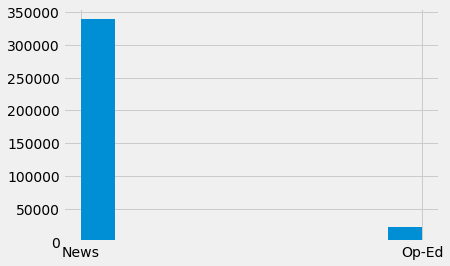

In [100]:
functions.oped_v_news(data)

In [101]:
data.columns

Index(['lead_paragraph', 'print_page', 'keywords', 'pub_date',
       'type_of_material', 'text'],
      dtype='object')

In [102]:
%%time
df = data.copy()

CPU times: user 132 ms, sys: 442 ms, total: 574 ms
Wall time: 621 ms


In [103]:
df.shape

(360498, 6)

In [104]:
df = printed_df(df)

In [105]:
df.head()

,print_page,pub_date,keywords,type_of_material,lead_paragraph,text
_id,,,,,,
nyt://article/d5dc06a2-db1f-58f2-9a8f-061979998358,1,2010-11-01T00:00:20+0000,"[{'name': 'subject', 'value': 'Graffiti', 'ran...",News,A vast new exhibition space opened in New York...,A vast new exhibition space opened in New York...
nyt://article/6dedf0cd-767d-558d-8637-2b4512d23d05,10,2010-11-01T00:01:45+0000,"[{'name': 'persons', 'value': 'Serra, Jose', '...",News,"SÃO PAULO, Brazil  Dilma Rousseff was elected...","SÃO PAULO, Brazil  Dilma Rousseff was elected..."
nyt://article/873adafd-1ba0-5aa6-a482-f401d99fb541,6,2010-11-01T00:04:41+0000,"[{'name': 'subject', 'value': 'Search Engines'...",News,Start-ups and big companies alike have tried t...,Start-ups and big companies alike have tried t...
nyt://article/c69e42ef-f363-5979-b176-a352c6264df8,1,2010-11-01T00:05:17+0000,"[{'name': 'organizations', 'value': 'Republica...",News,WASHINGTON  Republicans made their closing ar...,WASHINGTON  Republicans made their closing ar...
nyt://article/c9f54c4f-c608-5a4c-bdf1-73d7e8890ed1,12,2010-11-01T00:13:58+0000,"[{'name': 'subject', 'value': 'Children and Yo...",News,"MIAMI — Two years ago, the University of Miami...","MIAMI — Two years ago, the University of Miami..."


In [106]:
df.text.iloc[0]

'A vast new exhibition space opened in New York City this summer, with a show 18 months in the making. On view are works by 103 street artists from around the world, mostly big murals painted directly onto the gallery’s walls.It is one of the largest shows of such pieces ever mounted in one place, and many of the contributors are significant figures in both the street-art world and the commercial trade that now revolves around it. Its debut might have been expected to draw critics, art dealers and auction-house representatives, not to mention hordes of young fans. But none of them were invited.In the weeks since, almost no one has seen the show. The gallery, whose existence has been a closely guarded secret, closed on the same night it opened.Known to its creators and participating artists as the Underbelly Project, the space, where all the show’s artworks remain, defies every norm of the gallery scene. Collectors can’t buy the art. The public can’t see it. And the only people with a c

In [107]:
last_check_before_split = (df.iloc[0])
last_check_before_split

print_page                                                          1
pub_date                                     2010-11-01T00:00:20+0000
keywords            [{'name': 'subject', 'value': 'Graffiti', 'ran...
type_of_material                                                 News
lead_paragraph      A vast new exhibition space opened in New York...
text                A vast new exhibition space opened in New York...
Name: nyt://article/d5dc06a2-db1f-58f2-9a8f-061979998358, dtype: object

News: 339111 Oped: 21387, Total: 360498, Op-Ed 0.06 of total


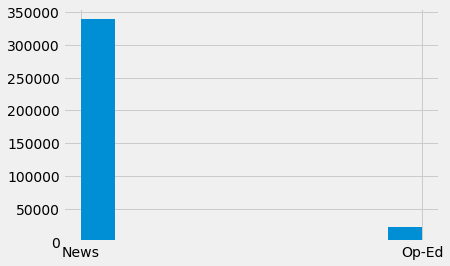

In [108]:
oped_v_news(df)

# drop na

In [109]:
df.shape

(360498, 6)

In [110]:
df = df.dropna()

In [111]:
df.shape

(359957, 6)

# X, y

In [112]:
#define X. X is currently pandas series of unsplit strings
X = df.text

In [113]:
#turn series into list...
corpus = list(X)

In [114]:
corpus[0]

'A vast new exhibition space opened in New York City this summer, with a show 18 months in the making. On view are works by 103 street artists from around the world, mostly big murals painted directly onto the gallery’s walls.It is one of the largest shows of such pieces ever mounted in one place, and many of the contributors are significant figures in both the street-art world and the commercial trade that now revolves around it. Its debut might have been expected to draw critics, art dealers and auction-house representatives, not to mention hordes of young fans. But none of them were invited.In the weeks since, almost no one has seen the show. The gallery, whose existence has been a closely guarded secret, closed on the same night it opened.Known to its creators and participating artists as the Underbelly Project, the space, where all the show’s artworks remain, defies every norm of the gallery scene. Collectors can’t buy the art. The public can’t see it. And the only people with a c

In [115]:
# define y as a series of op-ed or news
y = df.type_of_material

In [116]:
vectorize_y_ser(y)

_id
nyt://article/d5dc06a2-db1f-58f2-9a8f-061979998358    0
nyt://article/6dedf0cd-767d-558d-8637-2b4512d23d05    0
nyt://article/873adafd-1ba0-5aa6-a482-f401d99fb541    0
nyt://article/c69e42ef-f363-5979-b176-a352c6264df8    0
nyt://article/c9f54c4f-c608-5a4c-bdf1-73d7e8890ed1    0
                                                     ..
nyt://article/a4383433-5708-530c-bf78-2ec5ee0d96cd    0
nyt://article/aff30fb5-0177-5fed-b8b5-55656f2672f6    0
nyt://article/d67ea079-eaf8-5e69-a77c-3138a3fc91cb    0
nyt://article/5af20a48-6f66-5bae-a9fd-948268ed38cf    0
nyt://article/3aea061c-d11a-53d1-8480-c0b163740360    0
Name: type_of_material, Length: 359957, dtype: int64

In [117]:
%%time
# vectorize y in to (1, 0) (op-ed, news)
y = vectorize_y_ser(y)

CPU times: user 99.2 ms, sys: 6.26 ms, total: 105 ms
Wall time: 106 ms


In [118]:
y.value_counts()

0    338600
1     21357
Name: type_of_material, dtype: int64

In [119]:
y.shape
X.shape

(359957,)

# remove stop words

# stemming/lemmatization

In [120]:
snowball = SnowballStemmer('english')
wordnet = WordNetLemmatizer()

In [121]:
# %%time
# def snowball_tokenize(doc):
#     snowball = SnowballStemmer('english')
#     return [snowball.stem(word) for word in word_tokenize(doc.lower())]

In [122]:
%%time
def wordnet_tokenize(doc):
    wordnet = WordNetLemmatizer()
    return  [wordnet.lemmatize(word) for word in word_tokenize(doc.lower())]

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs


# vectorizer

# WORDNET tfidf

In [123]:
import string

In [124]:
print(string.punctuation)
print('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [125]:
# nytimes_quotes = "”“"
# nytimes_punctuation = "—’"

In [126]:
#function that removes string.punctuation w/out the '?'
def punc_strip(document):
    for char in document:
        if char in '!"#$%&\'()*+—,-./:;<=>?@[\\]^_`{|}~':
            document = document.replace(char, " ")
        if char == '’':
            document = document.replace(char, "")
    return document

In [127]:
stop_words_nlp = ['isn']

In [128]:
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

In [129]:
stop_words = alphabet# + stop_words_nlp

In [130]:
%%time
#create vectorizer

vectorizer = TfidfVectorizer(#input='content', 
#                 encoding='utf-8', 
#                 decode_error='strict', 
#                 strip_accents='ascii', 
#                 lowercase=True, 
                 preprocessor=punc_strip, 
                 tokenizer=wordnet_tokenize, 
#                 analyzer='word', 
                 stop_words=stop_words,
#                 token_pattern='(?u)\b\w\w+\b', 
#                 ngram_range=(1, 2), 
                 max_df=0.85, 
                 min_df=0.1, 
                 max_features=None, 
#                 vocabulary=None, 
#                 binary=False, 
#                 dtype=<class 'numpy.float64'>, 
#                 norm='l2', 
#                 use_idf=True, 
#                 smooth_idf=True, 
#                 sublinear_tf=False
)

CPU times: user 150 µs, sys: 1.12 ms, total: 1.27 ms
Wall time: 2.74 ms


# test, train, split

In [131]:
#test, train, split

In [ ]:
%%time
#test, train, split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train = vectorizer.fit_transform(X_train)

X_test = vectorizer.transform(X_test)

(269967,) (89990,) (269967,) (89990,)


In [ ]:
X_train.shape

In [ ]:
X_test.shape

# count vectorizer

In [ ]:
# count_vectorizer = CountVectorizer(strip_accents='None',
#                                    lowercase=True,
#                                    tokenizer=snowball_tokenize,
#                                    stop_words='english',
#                                    max_features=None)

# balance classes

In [ ]:
%%time
#balance the classes

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

#X, y --> X_resampled, y_resampled
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))
print(rus)

# random forest classifier

In [ ]:
%%time
print(datetime.datetime.now())
rf_clf = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
rf_clf.fit(X_resampled, y_resampled)
y_pred = rf_clf.predict(X_test)
y_pred.shape

### metrics y_pred

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()

In [ ]:
print(y_test.shape)
print(y_pred.shape)

In [ ]:
metrics_(tn, fp, fn, tp)

In [ ]:
class_names = ["News", "Op-Ed"]
plot_confusion_matrix(estimator=rf_clf,
                      X=X_test,
                      y_true=y_test,
                      display_labels=class_names,
                      cmap='cividis')
#plt.savefig('img/confusion_matrix.png');

# vectorizer parameters

In [ ]:
vectorizer_parameters(vectorizer)

# important features

### feature imporance

In [ ]:
%%time
print(datetime.datetime.now())

feat_names = vectorizer.get_feature_names()
feature_import = rf_clf.feature_importances_

feat_scores = pd.Series(feature_import, index=feat_names)
feat_scores = feat_scores.sort_values()
ax = feat_scores[-10:].plot(kind='barh', figsize=(20,15))
ax.set_title('"Decrease in Impurity" Importance')
ax.set_xlabel('Average contribution to the reduction in variance')
#plt.savefig('img/feature_imporance.png');

In [ ]:
feat_scores[-10:].index

In [ ]:
count_df = df[['text', 'type_of_material']]
oped = count_df[count_df['type_of_material'] == "Op-Ed"]
news = count_df[count_df['type_of_material'] == "News"]

In [ ]:
print(oped.shape)
print(news.shape)

In [ ]:
oped_string = oped.text.str.cat(sep = " ")
num_oped_string = len(oped_string)
print(num_oped_string)

In [ ]:
news_string = news.text.str.cat(sep = " ")
num_news_string = len(news_string)
print(num_news_string)

# counting

In [ ]:
top = feat_scores[-6:].index

In [ ]:
%%time
oped_list = [word for word in oped_string.split() if word in list(top)]
oped_ed_counter = Counter(oped_list)
oped_ed_counter.items()

In [ ]:
%%time
news_list = [word for word in news_string.split() if word  in list(top)]
news_counter = Counter(news_list)
news_counter.items()

# merge dictionary

In [ ]:
# merge_dic.val[0] = news
# merge_dic.val[1] = oped

merge_dic = {}
for key, oped_val in oped_ed_counter.items():
    news_val = news_counter.get(key)
    merged_values = (news_val, oped_val)
    merged_values_set = set(merged_values)
    merge_dic[key] = merged_values_set

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

merge_dic = {}
for key, oped_val in oped_ed_counter.items():
    news_val = news_counter.get(key)
    merged_values = (news_val, oped_val)
    merge_dic[key] = merged_values

keys = []
news_counts = []
oped_counts = []
    
for k, v in merge_dic.items():
    keys.append(k)
    news_counts.append(v[0]/num_news_string)
    oped_counts.append(v[1]/num_oped_string)

x = np.arange(len(keys))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x - width/2, news_counts, width, label='News')
rects2 = ax.bar(x + width/2, oped_counts, width, label='Op-Ed')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Word distribution in News and Op-Ed')
ax.set_xticks(x)
#ax.set_yscale('log')
ax.set_xticklabels(keys)
ax.legend()

# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()
plt.xticks(rotation=45, fontsize=30)
plt.show()

# oped most common 

In [81]:
top_10

NameError: name 'top_10' is not defined

In [ ]:
%%time
oped_list_features = [word for word in oped_string.split() if word in list(top)]
oped_ed_count_total = Counter(oped_list_features)

In [ ]:
%%time
news_list_features = [word for word in news_string.split() if word in list(top)]
news_counter_total = Counter(news_list_features)

In [ ]:
%%time
merge_dic_total = {}
for key, oped_val in oped_ed_count_total.items():
    news_val = news_counter_total.get(key)
    merged_values_total = (news_val, oped_val)
    merge_dic_total[key] = merged_values_total

news_words = []
oped_words = []
    
for k, v in merge_dic_total.items():
    if v[0]/num_news_string > v[1]/num_oped_string:
        news_words.append(k)
    else:
        oped_words.append(k)

In [ ]:
len(top_10)

In [ ]:
print(len(news_words))
print(len(oped_words))

In [ ]:
news_words

In [ ]:
oped_words

In [ ]:
print(num_oped_string)
print(num_news_string)

In [ ]:
# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np


# labels = oped_ed_counter.keys()
# #news_labels = news_counter.keys()

# oped_counts = oped_ed_counter.values()
# #news_counts = news_counter.values()

# x = np.arange(len(labels))  # the label locations
# width = 0.5  # the width of the bars

# fig, ax = plt.subplots(figsize=(10,10))
# rects1 = ax.bar(x - width/2, oped_counts, width, label='oped')
# #rects2 = ax.bar(x + width/2, news_counts, width, label='news')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# #ax.set_ylabel('Scores')
# ax.set_title('words in oped corpus')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()

# fig.tight_layout()
# plt.xticks(rotation=90)
# plt.show()

In [ ]:
# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np


# labels = news_counter.keys()
# #news_labels = news_counter.keys()

# oped_counts = news_counter.values()
# #news_counts = news_counter.values()

# x = np.arange(len(labels))  # the label locations
# width = 0.5  # the width of the bars

# fig, ax = plt.subplots(figsize=(10,10))
# rects1 = ax.bar(x - width/2, oped_counts, width, label='news')
# #rects2 = ax.bar(x + width/2, news_counts, width, label='news')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# #ax.set_ylabel('Scores')
# ax.set_title('words in news corpus')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()

# fig.tight_layout()
# plt.xticks(rotation=90)
# plt.show()

### permutation importance

In [ ]:
# %%time
# print(datetime.datetime.now())
# r = permutation_importance(rf_clf, X_test.toarray(), y_test, n_repeats=30, random_state=0)

In [ ]:
# for i in r.importances_mean.argsort()[::-1]:
#     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
#         print(f"{feat_names[i]:<8}"
#               f"{r.importances_mean[i]:.3f}"
#               f" +/- {r.importances_std[i]:.3f}")

In [ ]:
# for i in r.importances_mean.argsort()[::-1]:
#     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
#         print(f"{feat_names[i]:<20}")
# #               f"{r.importances_mean[i]:.3f}"
# #               f" +/- {r.importances_std[i]:.3f}")

In [ ]:
# len(feat_names)

In [ ]:
#corpus[0]

# make a plot

In [ ]:
#y

In [ ]:
#min_df = np.linspace(0,.4,5)

In [ ]:
#min_df

In [ ]:
#corpus[0]

# min_df_plot

In [ ]:
# #%%time
# #num_feat_min = []

# #min_df = np.linspace(0.01,0.5,5)

# for val in min_df:
#     vectorizer_plot = TfidfVectorizer(preprocessor=punc_strip,
# #                 tokenizer=wordnet_tokenize,
#                 stop_words=alphabet,
# #                 max_df=0.95,
#                  min_df=val,
#                  max_features=None)
    
#     vectorizer_plot.fit(X)
    
#     features = vectorizer_plot.get_feature_names()
#     stop_word = vectorizer_plot.get_stop_words()

#     num_feat_min.append(len(features))

In [ ]:
# learn_vect = TfidfVectorizer(preprocessor=punc_strip,
#                  tokenizer=wordnet_tokenize,
# #            stop_words=alphabet,
# #                max_df=0.95,
#              min_df=.2,
#              max_features=None)

# learn_vect.fit(X)

# min_df_features = learn_vect.get_feature_names()
# stop_word = learn_vect.get_stop_words()

In [ ]:
#len(min_df_features)

In [ ]:
#min_df_features

# max_features

In [ ]:
# %%time
# TN = []
# FP = []
# FN = []
# TP = []

# num_feat = np.linspace(1000,50000,6)

# for val in num_feat:
#     vectorizer_plot = TfidfVectorizer(preprocessor=punc_strip,
# #                 tokenizer=wordnet_tokenize,
#                 stop_words=alphabet,
# #                 max_df=0.95,
# #                 min_df=val,
#                  max_features=int(val))

#     #test, train, split
#     X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

#     X_train = vectorizer_plot.fit_transform(X_train)

#     X_test = vectorizer_plot.transform(X_test)
    
#     #X, y --> X_resampled, y_resampled
#     rus = RandomUnderSampler(random_state=0)
#     X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
    
#     recall_rfc = RandomForestClassifier(max_depth=2, random_state=0)

#     rf_clf.fit(X_resampled, y_resampled)
#     y_pred = rf_clf.predict(X_test)
    
#     tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()
#     a, r, p  = metrics_(tn, fp, fn, tp)
    
#     TN.append(tn)
#     FP.append(fp)
#     FN.append(fn)
#     TP.append(tp)
    
    
#     num_feat_min.append(len(features))

In [ ]:
# for f in features:
#     model = RandomForestClassifier(max_features=f)
#     score = cross_val_score(model, X, y).mean()
#     print('A Random Forest Regressor with max features of: {} gets a score of {}'
#           .format(f,score))
#     scores.append(score)
    
# fig, ax = plt.subplots()
# ax.plot(features, scores)

In [ ]:
# for f in features:
#     model = RandomForestClassifier(max_features=f)
#     score = cross_val_score(model, X, y).mean()
#     print('A Random Forest Regressor with max features of: {} gets a score of {}'
#           .format(f,score))
#     scores.append(score)

In [ ]:
# #stacked bar graph

# video_sales_df = pd.read_excel("data.xlsx")

# regional_genre = video_sales_df.groupby(['Genre'],as_index=False)["NA_Sales","EU_Sales","JP_Sales"].sum()[:5]
# columns = ["NA_Sales","EU_Sales","JP_Sales"]

# # Normalization parameters
# normalize_min = 0.1
# normalize_max = 1

# # Normalize
# regional_genre[columns]= preprocessing.minmax_scale(regional_genre[columns], feature_range=(normalize_min, normalize_max))

# # Plot stacked bars
# plt.bar(regional_genre["Genre"], regional_genre["NA_Sales"], label="NA_Sales")
# plt.bar(regional_genre["Genre"], regional_genre["EU_Sales"], bottom=regional_genre["NA_Sales"], label="EU_Sales")
# plt.bar(regional_genre["Genre"], regional_genre["JP_Sales"], bottom=regional_genre["EU_Sales"]+regional_genre["NA_Sales"], label="JP_Sales")
# plt.legend()
# plt.ylabel("Normalized sales")
# plt.show()

# # Another solution for plot:

# plt.bar(columns, regional_genre.ix[0,1:], label="Action")
# bot = regional_genre.ix[0,1:]
# plt.bar(columns, regional_genre.ix[1,1:], bottom=bot, label="Adventure")
# bot += regional_genre.ix[1,1:]
# plt.bar(columns, regional_genre.ix[2,1:], bottom=bot, label="Fighting")
# bot += regional_genre.ix[2,1:]
# plt.bar(columns, regional_genre.ix[3,1:], bottom=bot, label="Misc")
# bot += regional_genre.ix[3,1:]
# plt.bar(columns, regional_genre.ix[4,1:], bottom=bot, label="Platform")